#                                   Topic -- **Machine Learning in Health Care**
##                                       By -- Harichandana Gonuguntla


# Objectives and approach

This notebook is a prototype of the Machine Learning in Health Care topic that I have chosen.

Data for predicting hospital mortality was gathered from the MIMIC-III Clinical Database, a substantial public database containing anonymized health records from about 60,000 ICU admissions. MIMIC-III database is described in:

> Johnson AEW, Pollard TJ, Shen L, Lehman L, Feng M, Ghassemi M, Moody B, Szolovits P, Celi LA, Mark RG. MIMIC-III, a freely accessible critical care database. Scientific Data (2016).

This module emphasizes the importance of data preparation in machine learning (ML) projects. This phase transforms raw data from electronic health records into a structured format suitable for ML algorithms. Understanding the algorithm's learning objective is crucial for selecting relevant information and variables. Often, the initial data format isn't immediately suitable for ML, necessitating preprocessing and analysis. The outcome of ML projects heavily depends on these initial data decisions. Optimizing the ML algorithm is less effective with poor-quality data. It's more beneficial to revisit data extraction and preprocessing stages than to apply complex algorithms to subpar data. A simple algorithm with high-quality data is preferable to a complex algorithm with poor data. In particular, the data preparation phase consists of:

* Exploratory data analysis
* Variable selection
* Identification and exclusion of outliers
* Data aggregation
* Inclusion criteria
* Feature construction
* Data partitioning

The machine learning phase consists of:

* Logistic regression


The first step is to import essential python libraries and MIMIC-III data.


# Import libraries and data

The next example shows the Python code that imports the following python libraries:

* Numpy: fundamental package for scientific computing with Python. Provides a fast numerical array structure;
* Pandas: provides high-performance, easy-to-use data structures and data analysis tools;
* Matplotlib: basic plotting library;
* IPython: for interactive data visualization.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

The following example demonstrates using Python to load data into a Pandas DataFrame, a versatile tabular structure ideal for various operations like arithmetic and grouping. For ease of data manipulation, the unique ICU stay ID is designated as the DataFrame index by setting the 'index_col' parameter to the index column's name.


In [24]:
#data = pd.read_csv('/REPO_PATH/mimic3_mortality.csv', index_col='icustay')
data = pd.read_csv('mimic3_mortality.csv')


In [25]:
import os

# Get the current working directory
current_working_directory = os.getcwd()

current_working_directory


'/content'

# Exploratory data analysis

To get an initial glimpse of the 'data' DataFrame, the 'head' function can be employed, displaying the first five rows of the DataFrame for a quick overview.

In [26]:
data.head()

,icustay,hours,diastolic BP,glasgow coma scale,glucose,heart rate,mean BP,oxygen saturation,respiratory rate,systolic BP,temperature,age,gender,height,pH,weight,day,mortality
0,282372.0,0.066667,60.0,NaN,NaN,139.0,84.666702,100.0,20.0,134.0,NaN,48.682393,2.0,NaN,NaN,59.0,1.0,1.0
1,282372.0,0.150000,73.0,NaN,NaN,128.0,93.000000,100.0,25.0,133.0,NaN,48.682393,2.0,NaN,NaN,59.0,1.0,1.0
2,282372.0,0.233333,81.0,NaN,NaN,127.0,88.666702,100.0,22.0,104.0,NaN,48.682393,2.0,NaN,NaN,59.0,1.0,1.0
3,282372.0,0.316667,86.0,NaN,NaN,132.0,100.000000,100.0,19.0,128.0,NaN,48.682393,2.0,NaN,NaN,59.0,1.0,1.0
4,282372.0,0.400000,86.0,NaN,NaN,138.0,100.333000,100.0,21.0,129.0,NaN,48.682393,2.0,NaN,NaN,59.0,1.0,1.0


The dataset comprises patient demographic details like age, gender, weight, height, and mortality status, along with physiological vital signs such as diastolic and systolic blood pressure, mean blood pressure, temperature, and respiratory rate. It also includes lab test results for glucose and pH, as well as Glasgow coma scale scores. Each data row is timestamped with 'hours' since ICU admission. The dataset features multiple observations for each variable per ICU stay. The total number of ICU stays can be determined by counting unique indexes. The 'info' function can be used to identify missing data, while 'describe' provides summary statistics.

In [27]:
print('Number of ICU stays: ' + str(len(data.index.unique())))
print('Number of survivors: ' + str(len(data[data['mortality']==0].index.unique())))
print('Number of non-survivors: ' + str(len(data[data['mortality']==1].index.unique())))
print('Mortality: ' + str(round(100*len(data[data['mortality']==1].index.unique()) / len(data.index.unique()),1)) + '%')
print()
display.display(data.info(null_counts=1))
display.display(data.describe())


Number of ICU stays: 764277
Number of survivors: 646506
Number of non-survivors: 117770
Mortality: 15.4%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764277 entries, 0 to 764276
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   icustay             764277 non-null  float64
 1   hours               764277 non-null  float64
 2   diastolic BP        528266 non-null  float64
 3   glasgow coma scale  82829 non-null   float64
 4   glucose             128612 non-null  float64
 5   heart rate          555629 non-null  float64
 6   mean BP             524730 non-null  float64
 7   oxygen saturation   558717 non-null  float64
 8   respiratory rate    559958 non-null  float64
 9   systolic BP         528477 non-null  float64
 10  temperature         167473 non-null  float64
 11  age                 764276 non-null  float64
 12  gender              764276 non-null  float64
 13  height              238844 n

None

,icustay,hours,diastolic BP,glasgow coma scale,glucose,heart rate,mean BP,oxygen saturation,respiratory rate,systolic BP,temperature,age,gender,height,pH,weight,day,mortality
count,764277.000000,764277.000000,528266.000000,82829.000000,128612.000000,555629.000000,524730.000000,558717.000000,5.599580e+05,528477.000000,167473.000000,764276.000000,764276.000000,238844.000000,63695.000000,685137.000000,764276.000000,764276.000000
mean,250221.722734,21.854077,61.182212,11.635236,143.701232,87.140475,78.788963,96.824902,2.348749e+01,119.762328,37.023422,65.411346,1.552744,169.271250,7.286024,82.724092,1.440664,0.154094
std,29186.241542,14.172801,255.122714,3.900205,75.109040,18.993104,203.268675,14.433895,3.147843e+03,33.883154,13.321817,16.755953,0.497211,14.322278,3.085977,24.558103,0.496467,0.361039
min,200001.000000,0.000000,-13.000000,3.000000,0.000000,0.000000,-34.000000,0.000000,0.000000e+00,0.000000,-3.000000,18.034034,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,224268.000000,9.022222,51.000000,9.000000,106.000000,74.000000,67.000000,96.000000,1.500000e+01,103.000000,36.444444,54.728336,1.000000,163.000000,7.310000,66.269791,1.000000,0.000000
50%,250614.000000,20.953889,59.000000,14.000000,129.000000,86.000000,76.333298,98.000000,1.900000e+01,117.000000,37.000000,67.489877,2.000000,170.000000,7.370000,79.000000,1.000000,0.000000
75%,276017.000000,34.022778,68.000000,15.000000,162.000000,99.000000,87.000000,100.000000,2.300000e+01,134.000000,37.500000,78.905462,2.000000,178.000000,7.420000,94.600000,2.000000,0.000000
max,299995.000000,48.000000,114108.980000,15.000000,9999.000000,900.000000,117120.030000,10099.000000,2.355555e+06,13756.000000,5336.111111,90.000000,2.000000,429.000000,733.000000,300.000000,2.000000,1.000000


The provided dataset contains information on 21,139 unique ICU stays, encompassing a total of 1,461,282 observations. Notably, all columns except 'hours', 'mortality', and 'day' contain missing data. Upon examination of the maximum and minimum values, the presence of outliers, such as exceedingly high glucose levels, is evident. Missing data and outliers are prevalent in ICU databases and must be addressed prior to employing machine learning algorithms for analysis.

# Variable selection

While incorporating additional variables into a machine learning model can potentially enhance its predictive capabilities, it's crucial to balance this potential benefit with the availability of complete data. While we've already examined the extent of missing data for each individual column, we haven't yet assessed the completeness of data at the patient level. To address this, we'll aggregate data by ICU stay and calculate the average number of non-null values for each variable using the 'groupby' function in conjunction with the 'mean' operator. This will provide an indication of the proportion of ICU stays that have at least one observation for each variable.

Please note that a single patient may have multiple ICU stays. In this analysis, for the sake of simplicity, we will treat each ICU stay as an independent sample.


In [28]:
print(data.groupby(['icustay']).mean().info(null_counts=1))

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9350 entries, 200001.0 to 299995.0
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours               9350 non-null   float64
 1   diastolic BP        9241 non-null   float64
 2   glasgow coma scale  5425 non-null   float64
 3   glucose             9345 non-null   float64
 4   heart rate          9241 non-null   float64
 5   mean BP             9239 non-null   float64
 6   oxygen saturation   9292 non-null   float64
 7   respiratory rate    9238 non-null   float64
 8   systolic BP         9241 non-null   float64
 9   temperature         9184 non-null   float64
 10  age                 9350 non-null   float64
 11  gender              9350 non-null   float64
 12  height              2360 non-null   float64
 13  pH                  7767 non-null   float64
 14  weight              8028 non-null   float64
 15  day                 9350 non-null   float6

Based on the previous information, some decisions are made:

* Height can be discarded due to the high amount of missing data;

* Weight and height are typically used in combination (body mass index), since individually they typically provide low predictive power. Therefore, weight can also be discarded;

* The other variables will be kept. Let us start with time-variant variables and set aside age and gender for now.


In [29]:
variables = ['diastolic BP', 'glasgow coma scale',
             'glucose', 'heart rate', 'mean BP',
             'oxygen saturation', 'respiratory rate', 'systolic BP',
             'temperature', 'pH']
variables_mort = variables.copy()
variables_mort.append('mortality')

# Data preprocessing
## Outliers
### Data visualization

While we've identified the presence of outliers in the dataset, a more thorough examination is necessary to guide our approach to handling them. Utilizing the 'seaborn' library and its 'boxplot' function, we can efficiently visualize the distribution of each variable through boxplots. Seaborn is a high-level visualization library built upon matplotlib, offering a user-friendly interface for creating statistical graphics.

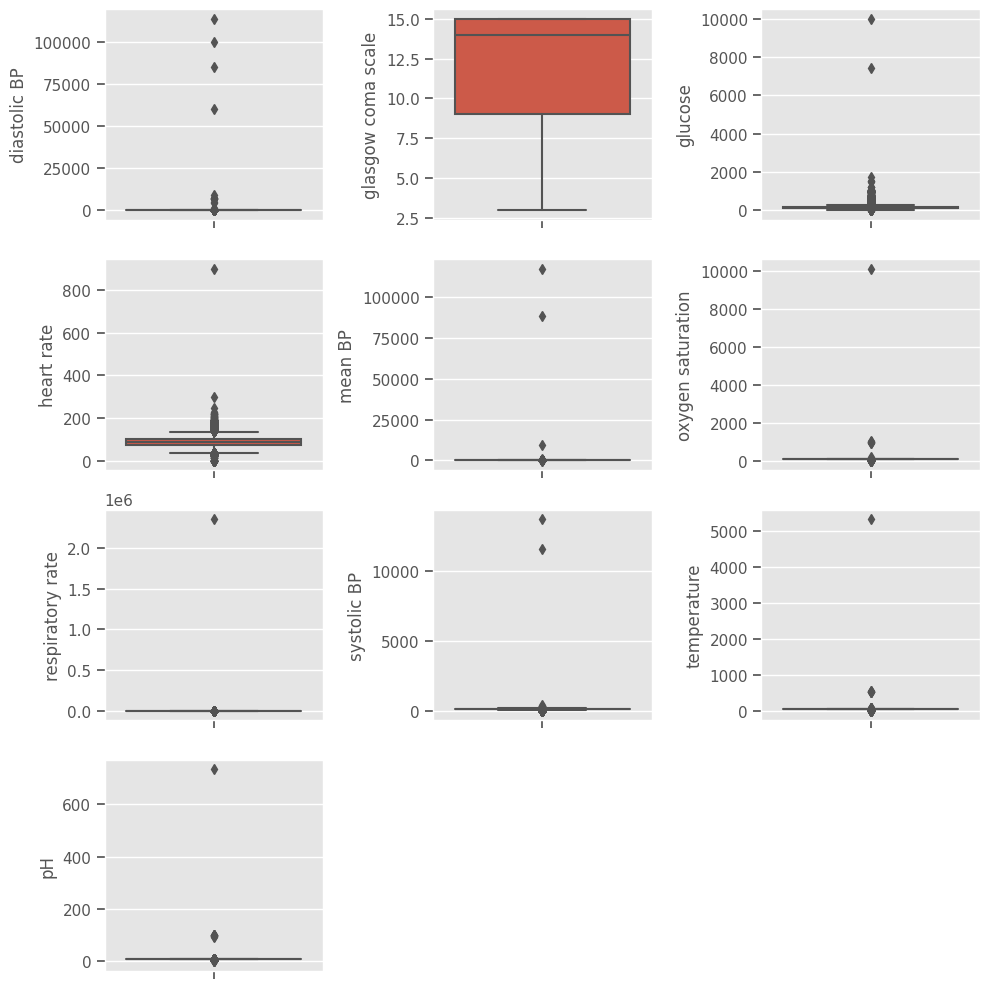

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
count = 0
for variable in variables:
    count += 1
    plt.subplot(4, 3, count)
    ax = sns.boxplot(y=variable, data=data)

fig.tight_layout()
plt.show()

### Exclusion

Ideally, we should keep extreme values related to the patients' poor health condition and exclude impossible values (such as negative temperature) and probable outliers (such as heart rate above 250 beats/min). In order to do so, values that fall outside boundaries defined by expert knowledge are excluded. This way, we avoid excluding
extreme (but correct/possible) values.


In [31]:
nulls_before = data.isnull().sum().sum()

data.loc[data['diastolic BP']>300, 'diastolic BP'] = np.nan
data.loc[data['glucose']>2000, 'glucose'] = np.nan
data.loc[data['heart rate']>400, 'heart rate'] = np.nan
data.loc[data['mean BP']>300, 'mean BP'] = np.nan
data.loc[data['mean BP']<0, 'mean BP'] = np.nan
data.loc[data['systolic BP']>10000,  'systolic BP'] = np.nan
data.loc[data['temperature']>50, 'temperature'] = np.nan
data.loc[data['temperature']<20, 'temperature'] = np.nan
data.loc[data['pH']>7.8, 'pH'] = np.nan
data.loc[data['pH']<6.8, 'pH'] = np.nan
data.loc[data['respiratory rate']>300, 'respiratory rate'] = np.nan
data.loc[data['oxygen saturation']>100, 'oxygen saturation'] = np.nan
data.loc[data['oxygen saturation']<0, 'oxygen saturation'] = np.nan

nulls_now = data.isnull().sum().sum()
print('Number of observations removed: ' + str(nulls_now - nulls_before))
print('Observations corresponding to outliers: ' + str(round((nulls_now - nulls_before)*100/data.shape[0],2)) + '%')


Number of observations removed: 4085
Observations corresponding to outliers: 0.53%


### Data visualization after outliers exclusion

The same code can be used to verify the data distribution after exclusion of outliers. The 'stripplot' function allows to visualize the underlying distribution and the number of observations. Setting x = 'mortality' shows the boxplots partitioned by outcome.

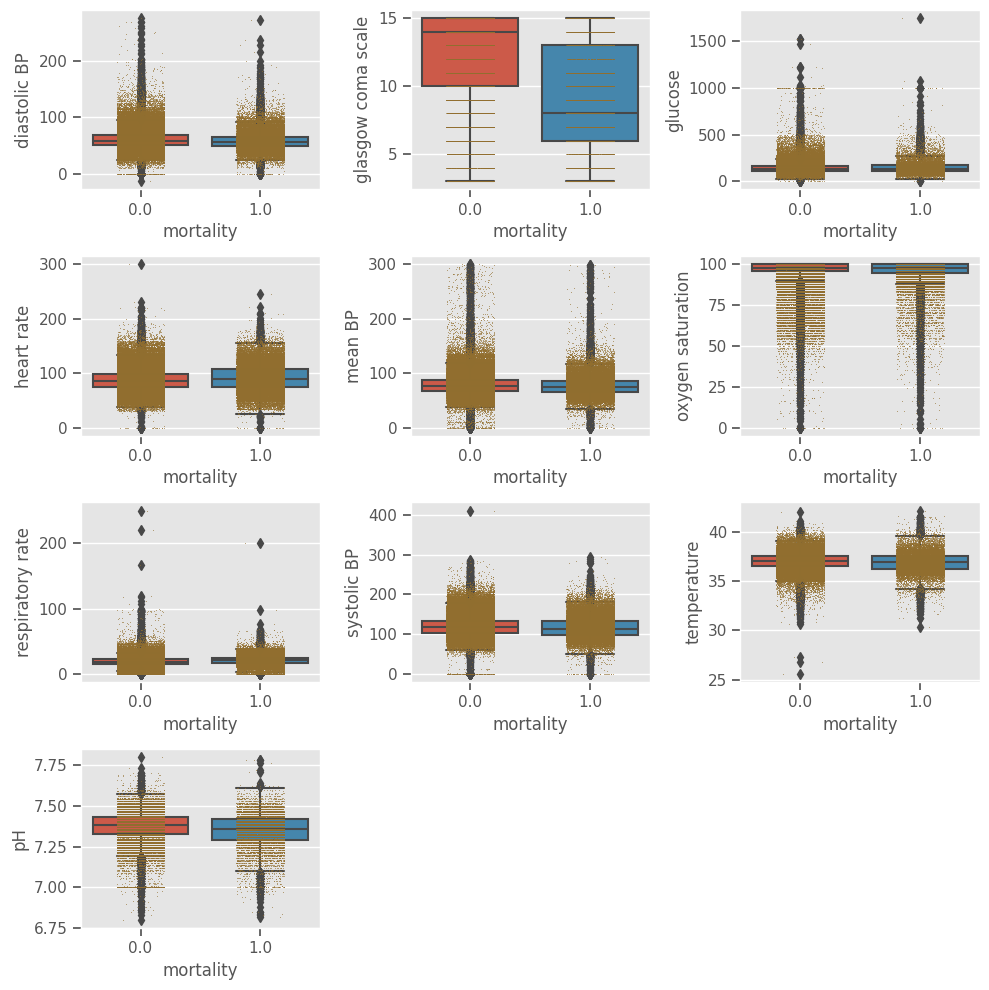

In [32]:
fig = plt.figure(figsize=(10,10))
count = 0
for variable in variables:
    count += 1
    plt.subplot(4, 3, count)

    #ax = sns.boxplot(y=variable, data=data)
    #ax = sns.stripplot(y=variable, data=data, color="orange", jitter=0.2, size=0.5)

    # same but partitioned by outcome
    ax = sns.boxplot(x = 'mortality', y=variable, data=data)
    ax = sns.stripplot(x = 'mortality', y=variable, data=data, color="orange", jitter=0.2, size=0.5)

fig.tight_layout()
plt.show()

## Aggregate data by hour

As previously mentioned, the dataset encompasses data from the first two days of ICU admission for each patient. Each observation is accompanied by a timestamp, representing the number of hours elapsed since ICU admission to the time of observation (e.g., 0.63 hours).

To facilitate comparisons across patients, individual data is aggregated into hourly observations by calculating the median value of all observations within each hour. Initially, the 'floor' operator is employed to classify the hours into 48 bins (hour 0, hour 1, ..., hour 47). Subsequently, the 'groupby' function in conjunction with the 'median' operator is applied to determine the median heart rate for each hour of each ICU stay. This process effectively summarizes the heart rate data for each patient into a more compact and comparable format.

In [33]:
data['hour'] = data['hours'].apply(np.floor)

# data goes until h = 48, change 48 to 47
data.loc[data['hour'] == 48, 'hour'] = 47

data_median_hour = data.groupby(['icustay','hour'])[variables_mort].median()


The 'groupby' function generates an index for each group it defines. To streamline subsequent operations, a single index is preferred. In the following example, the second index (the 'hour' column) is removed and retained as a separate DataFrame column. It's important to note that the first index corresponds to level 0 and the second index to level 1. Therefore, to exclude the second index while keeping it as a column, set the 'level' parameter to 1 and 'drop' to False.

In [34]:
data_median_hour = data_median_hour.reset_index(level=(1), drop = False)


The next example shows the vital signs for a specific ICU stay (ID = 200001). Consecutive hourly observations are connected by line.

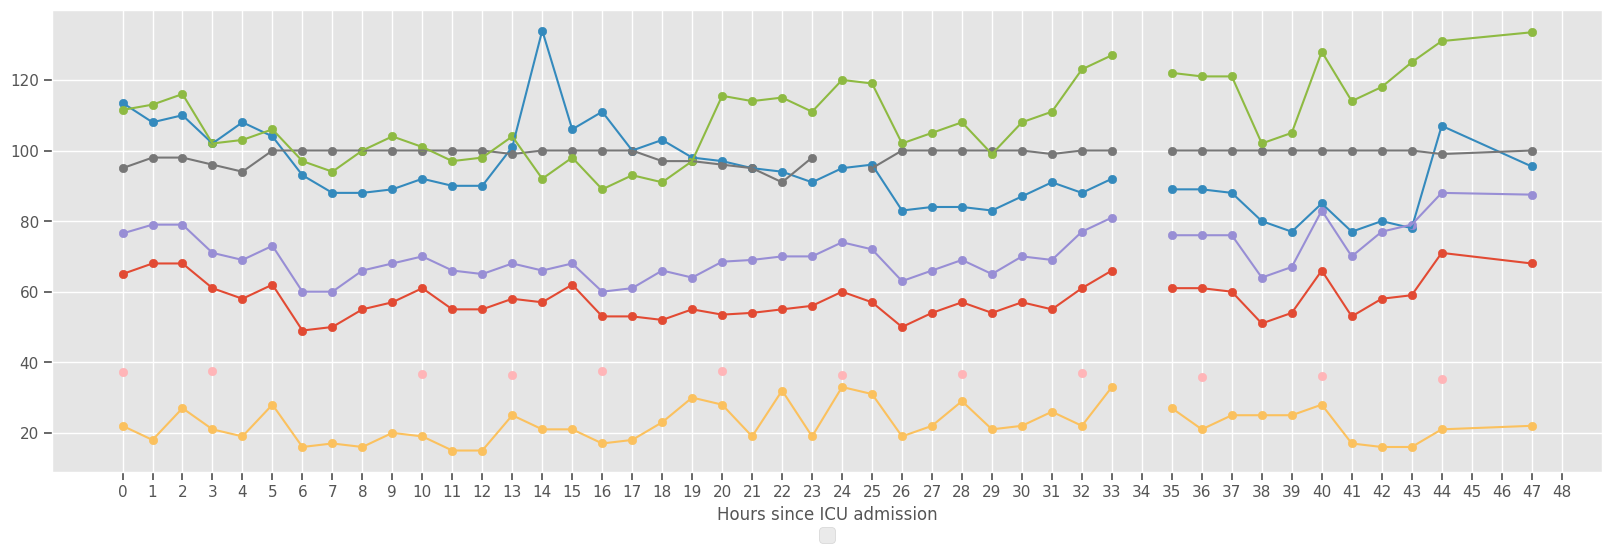

In [35]:
vitals = ['diastolic BP', 'heart rate', 'mean BP', 'oxygen saturation',
          'respiratory rate', 'systolic BP','temperature']
ICUstayID = 200001

fig, ax = plt.subplots(figsize=(20,6))

# scatter plot
for col in vitals:
    ax.scatter(data_median_hour.loc[ICUstayID,'hour'], data_median_hour.loc[ICUstayID,col])
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=len(vitals), prop={'size': 14})
    plt.xticks(np.arange(0, 49, step=1))
    plt.xlabel('Hours since ICU admission')

# connect consecutive points by line
for col in vitals:
    ax.plot(data_median_hour.loc[ICUstayID,'hour'], data_median_hour.loc[ICUstayID,col])

## Select minimum number of observations

To effectively train machine learning algorithms, we must address the issue of missing information. Two primary approaches exist: replacing missing values with estimated values or excluding cases with missing data. In this study, we will opt for the latter approach, known as complete case analysis. This involves excluding from our analysis patients with incomplete data, thereby avoiding the potential biases introduced by imputing missing values with estimates.

The concept of "complete information" can vary depending on the specific feature set being constructed. For instance, if we intend to utilize a single observation per hour, complete information would imply no missing data for every time point from t=0 to t=47, which would result in discarding a substantial portion of the data. To reduce the dimensionality of the feature space, a common strategy involves utilizing only specific segments of the time series. This approach will be adopted in this study. Relevant information will be extracted from the time series using summary statistics, such as mean, maximum, minimum, and standard deviation. In this context, it is crucial to define a minimum length for the time series before selecting portions of it. One viable approach is to include all patients with at least one observation per variable. However, since summary statistics hold limited value with only one observation, a threshold of two observations will be employed.

By setting 'min_num_meas = 2' in the following function, we are selecting ICU stays where each variable was measured at least once at two different time points. The 'groupby' function is employed to aggregate data by ICU stay, and the 'count' operator is used to determine the number of observations for each variable. Subsequently, ICU stays where any variable was recorded less than 2 times are excluded. Later in this chapter, we will explore methods for extracting features from the time series, aiming to reduce the dimensionality of the feature space.

In [36]:
min_num_meas = 2

def extr_min_num_meas(data_median_hour, min_num_meas):
    """ Select ICU stays where there are at least 'min_num_meas' observations
    and print the resulting DataFrame size"""
    data_count = data_median_hour.groupby(['icustay'])[variables_mort].count()

    for col in data_count:
        data_count[col] = data_count[col].apply(lambda x: np.nan if x < min_num_meas else x)

    data_count = data_count.dropna(axis=0, how='any')
    print('Number of ICU stays: ' + str(data_count.shape[0]))
    print('Number of features: ' + str(data_count.shape[1]))
    unique_stays = data_count.index.unique()

    data_median_hour = data_median_hour.loc[unique_stays]

    return data_median_hour

data_median_hour = extr_min_num_meas(data_median_hour, min_num_meas)

Number of ICU stays: 3618
Number of features: 11


It is always important to keep track of the size of data while making decisions about inclusion/exclusion criteria. We started with a database of around 60,000 ICU stays, imported a fraction of those that satisfied some criteria, in a total of 21,140 ICU stays, and are now looking at 6,931 ICU stays.

# Exploratory (preprocessed)data analysis


## Pairwise ploting

Pair plots, also known as scatterplot matrices, are a popular technique in exploratory data analysis. They allow for a simultaneous visualization of the distribution of individual variables and the pairwise relationships between them. Pair plots are readily implemented in Python using the 'seaborn' library. The provided example demonstrates how to create a pair plot that showcases the bivariate relationships between variables and the histograms of individual variables, categorized by outcome (survival vs non-survival). The 'vars' parameter identifies the set of variables to be included in the plot, while 'hue' specifies the use of distinct markers for each level of the hue variable. To reduce computational complexity, a subset of the data is utilized. The 'dropna(axis=0, how='any')' function excludes all rows containing any missing information.


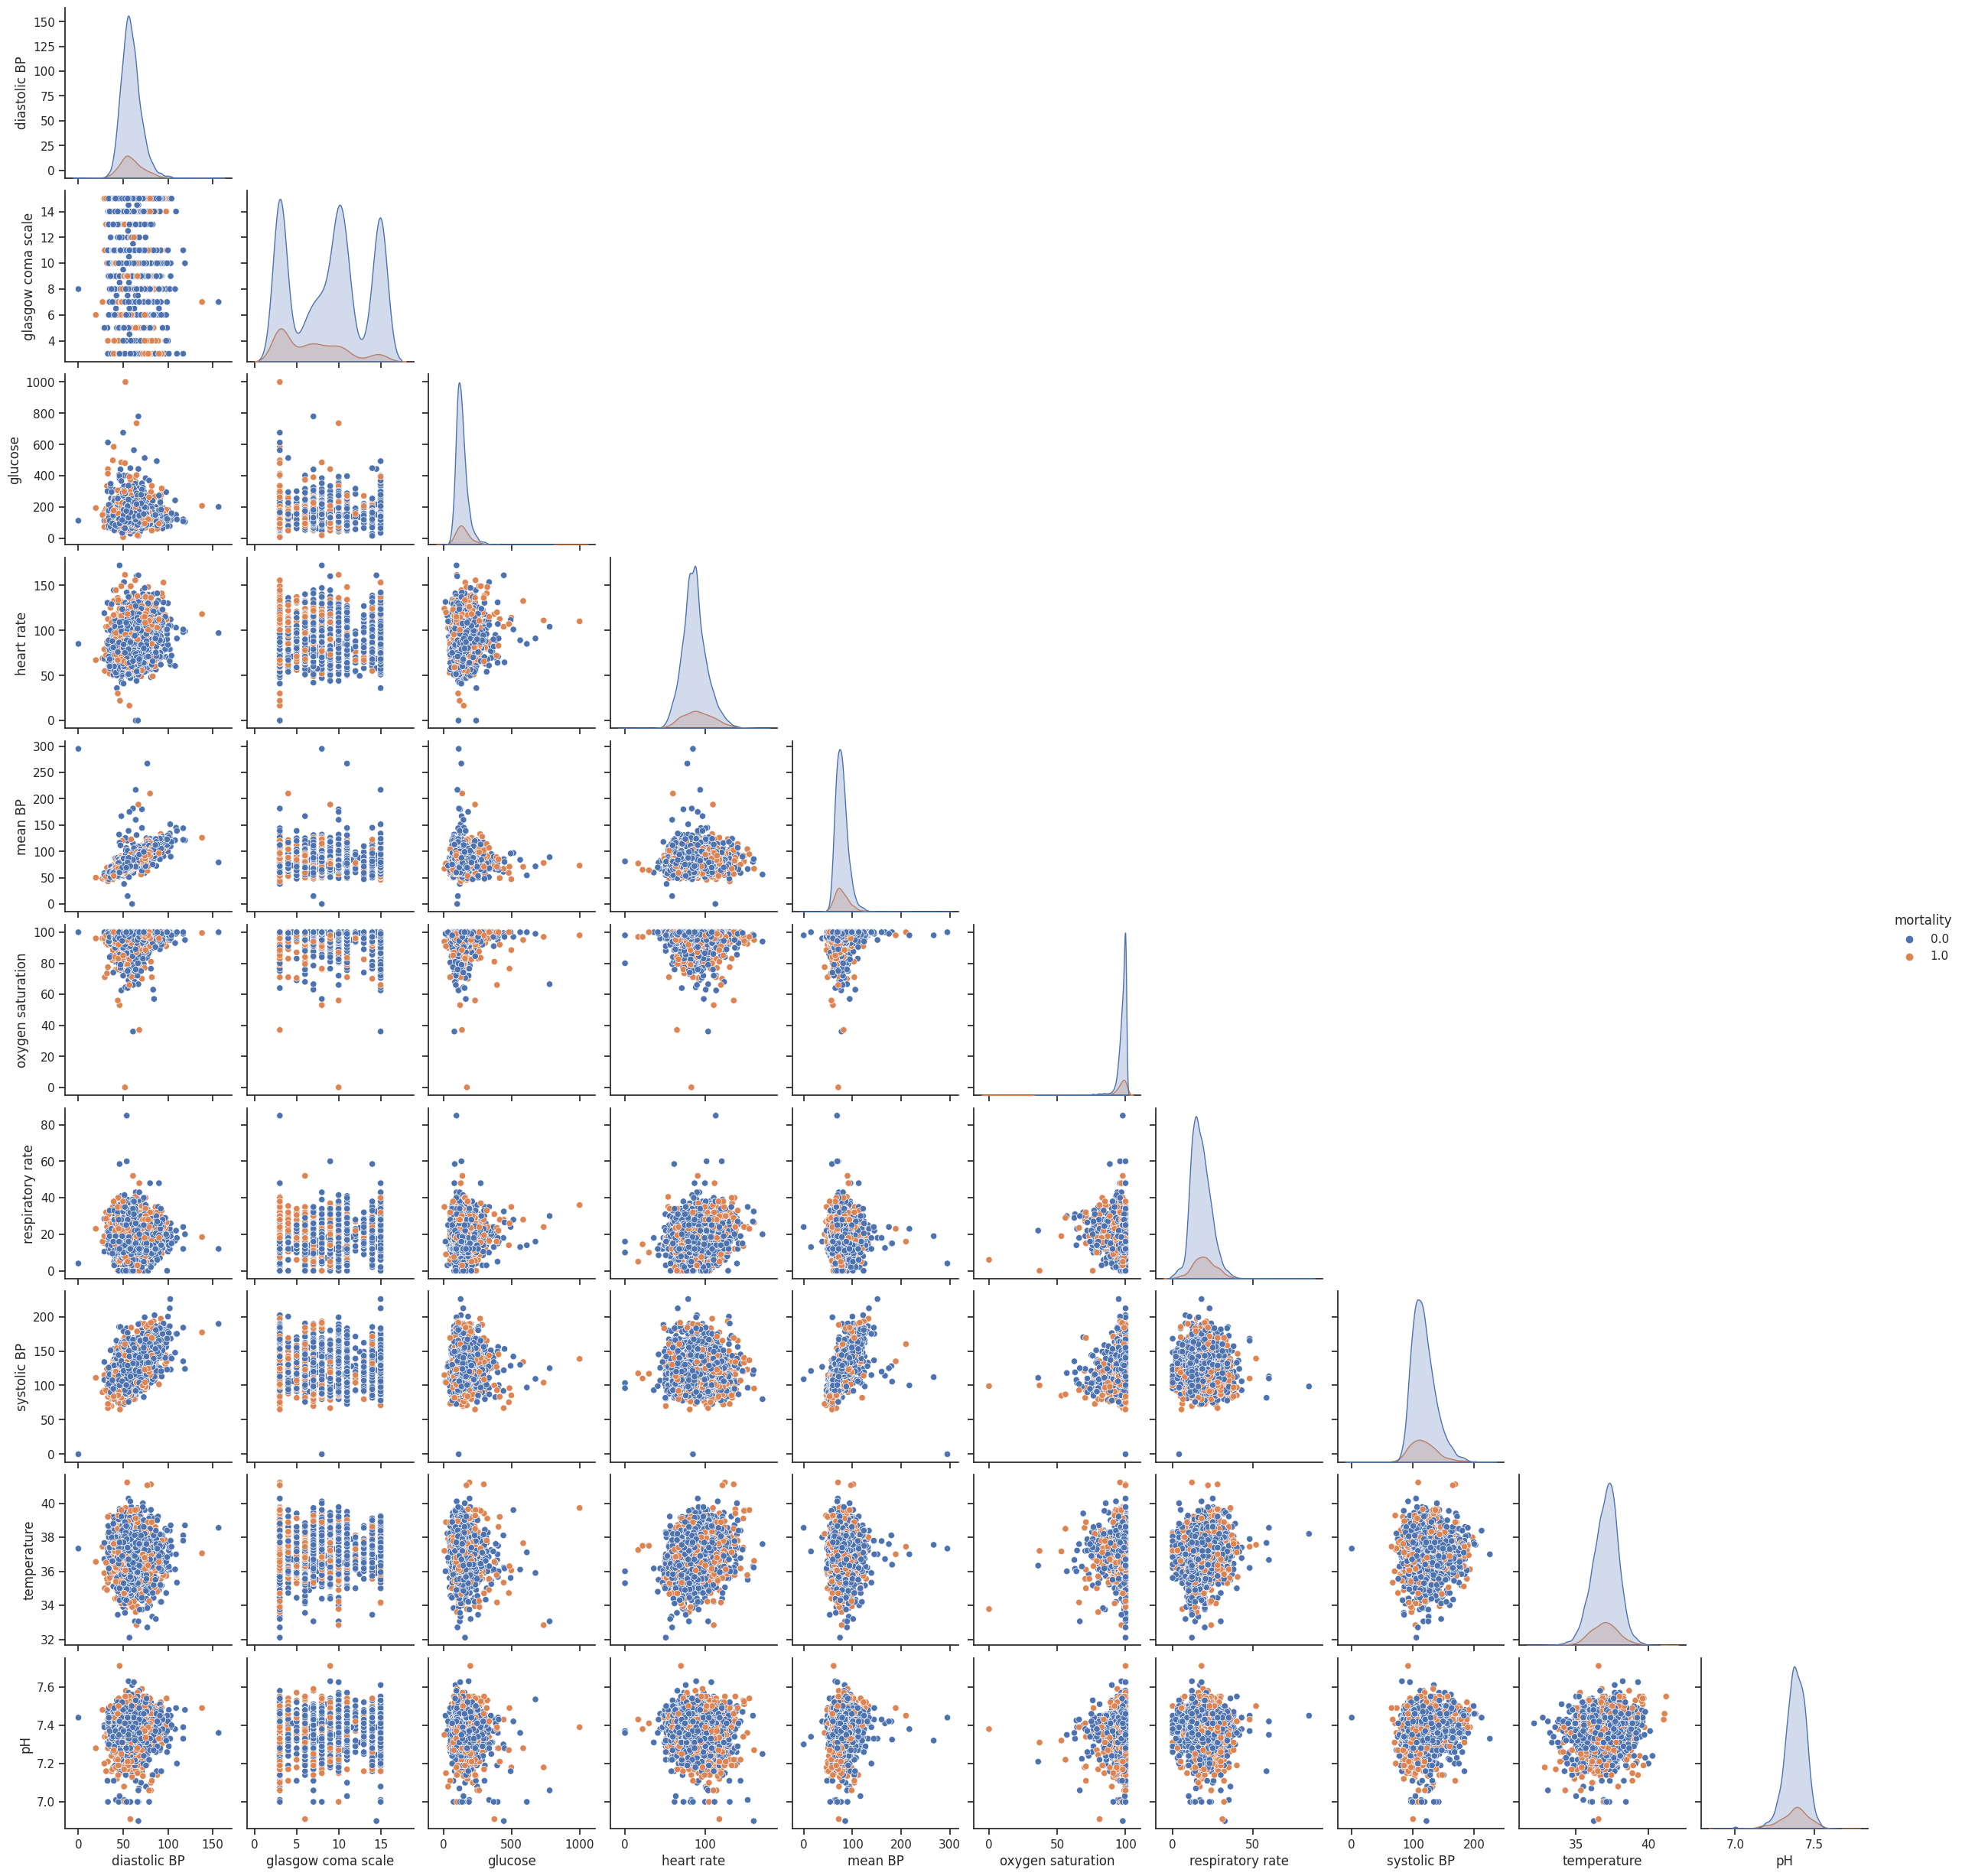

In [37]:
import seaborn as sns

sns.set(style="ticks")
g = sns.pairplot(data_median_hour[variables_mort].dropna(axis=0, how='any'), vars = variables, hue = 'mortality')

# hide the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

# change back to our preferred style
plt.style.use('ggplot')


While pair plots offer insights into bivariate relationships, they are limited to a 2D representation, which may not fully capture complex patterns or trends. Despite this limitation, pair plots remain valuable for understanding data characteristics and identifying potential areas for further data analysis. Key takeaways from pair plots include:

* Hypoxic patients generally have lower SBPs;
* SBP correlates with MAP, which is a nice test of the data's integrity;
* Fever correlates with increasing tachycardia, also as expected.

# Feature construction

The next step before ML is to extract relevant features from the time series. As already mentioned, the complete time series could be used for ML, however, missing information would have to be filled or excluded. Also, using the complete time series would result in \(48 \text{hours}\times 11 \text{variables}=528\) features, which would make the models difficult to interpret and could lead to overfitting. There is a simpler solution, which is to use only a portion of the information available, ideally the most relevant information for the prediction task.

Feature construction addresses the problem of finding the transformation of variables containing the greatest amount of useful information. In this chapter, simple operations will be used to construct/extract important features from the time series:

* Maximum
* Minimum
* Standard deviation
* Mean

These features summarize the worst, best, variation and average patient' condition from t=0 to t=47h. In the proposed exercises you will do this for each day separately, which will increase the dataset dimensionality but hopefully will allow the extraction of more useful information.

Using the 'groupby' function to aggregate data by ICU stay, together with the 'max', 'min', 'std' and 'mean' operators, these features can be easily extracted:

In [38]:
def feat_transf(data):
    data_max = data.groupby(['icustay'])[variables].max()
    data_max.columns = ['max ' + str(col) for col in data_max.columns]

    data_min = data.groupby(['icustay'])[variables].min()
    data_min.columns = ['min ' + str(col) for col in data_min.columns]

    data_sd = data.groupby(['icustay'])[variables].std()
    data_sd.columns = ['sd ' + str(col) for col in data_sd.columns]

    data_mean = data.groupby(['icustay'])[variables].mean()
    data_mean.columns = ['mean ' + str(col) for col in data_mean.columns]

    data_agg = pd.concat([data_min,data_max,data_sd,data_mean],axis=1)

    return data_agg

data_transf = feat_transf(data_median_hour).dropna(axis=0)

print('Extracted features: ')
display.display(data_transf.columns)
print('')
print('Number of ICU stays: ' + str(data_transf.shape[0]))
print('Number of features: ' + str(data_transf.shape[1]))


Extracted features: 


Index(['min diastolic BP', 'min glasgow coma scale', 'min glucose',
       'min heart rate', 'min mean BP', 'min oxygen saturation',
       'min respiratory rate', 'min systolic BP', 'min temperature', 'min pH',
       'max diastolic BP', 'max glasgow coma scale', 'max glucose',
       'max heart rate', 'max mean BP', 'max oxygen saturation',
       'max respiratory rate', 'max systolic BP', 'max temperature', 'max pH',
       'sd diastolic BP', 'sd glasgow coma scale', 'sd glucose',
       'sd heart rate', 'sd mean BP', 'sd oxygen saturation',
       'sd respiratory rate', 'sd systolic BP', 'sd temperature', 'sd pH',
       'mean diastolic BP', 'mean glasgow coma scale', 'mean glucose',
       'mean heart rate', 'mean mean BP', 'mean oxygen saturation',
       'mean respiratory rate', 'mean systolic BP', 'mean temperature',
       'mean pH'],
      dtype='object')


Number of ICU stays: 3618
Number of features: 40


In [39]:
mortality = data.loc[data_transf.index]['mortality'].groupby(['icustay']).mean()
age = data.loc[data_transf.index]['age'].groupby(['icustay']).mean()
gender = data.loc[data_transf.index]['gender'].groupby(['icustay']).mean()

data_transf_inv = pd.concat([data_transf, age, gender, mortality], axis=1).dropna(axis=0)
print('Number of ICU stays: ' + str(data_transf_inv.shape[0]))
print('Number of features: ' + str(data_transf_inv.shape[1]))

Number of ICU stays: 3618
Number of features: 43


# Data partitioning

To evaluate the performance of machine learning models, data can be divided into three subsets: training, test, and validation sets. This approach, known as the holdout validation method, is illustrated in the figure.

* Training set: used to train/build the learning algorithm.
* Validation (or development) set: use to tune parameters, select features, and make other decisions regarding the learning algorithm.
* Test set: used to evaluate the performance of the algorithm, but not to make any decisions regarding the learning algorithm architecture or parameters.





To streamline the analysis, the data is divided into two sets: training and testing. Subsequently, during feature selection, the training set will be further partitioned into training and validation sets.

Scikit-learn stands as the cornerstone of machine learning in Python, offering a comprehensive suite of tools for data mining and analysis. The provided example demonstrates how to employ the 'train_test_split' function from the 'sklearn' library to randomly allocate observations to each set. The size of the sets can be adjusted using the 'test_size' parameter, which specifies the proportion of data allocated to the test set. In this instance, 20% of the data is assigned to the test set. To ensure consistent results across replications, it's crucial to set the 'random_state' parameter.

In [40]:
from sklearn.model_selection import train_test_split

# set the % of observations in the test set
test_size = 0.2

# Divide the data intro training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_transf_inv, data_transf_inv[['mortality']], test_size = test_size, random_state = 10)


It is useful to create a function that prints the size of data in each set:

In [41]:
def print_size(y_train, y_test):
    print(str(len(y_train[y_train['mortality']==1])) + '(' + str(round(len(y_train[y_train['mortality']==1])/len(y_train)*100,1)) + '%)' + ' non-survivors in training set')
    print(str(len(y_train[y_train['mortality']==0])) + '(' + str(round(len(y_train[y_train['mortality']==0])/len(y_train)*100,1)) + '%)' + ' survivors in training set')
    print(str(len(y_test[y_test['mortality']==1])) + '(' + str(round(len(y_test[y_test['mortality']==1])/len(y_test)*100,1)) + '%)' + ' non-survivors in test set')
    print(str(len(y_test[y_test['mortality']==0])) + '(' + str(round(len(y_test[y_test['mortality']==0])/len(y_test)*100,1)) + '%)' + ' survivors in test set')


In situations where the data exhibits a significant class imbalance, it may be advantageous to either oversample the minority class or undersample the majority class to prevent the model from becoming biased towards the majority class. This process should be applied to the training set, while the test set should retain the original class imbalance to ensure that the final model evaluation reflects the true distribution of the data.

For the purpose of enhancing clustering interpretability, undersampling is employed. However, as a general rule, oversampling is typically preferred over undersampling unless the dataset contains an exceptionally large number of observations. This preference stems from the ability of oversampling to preserve all the information within the training set. Nevertheless, selecting learning algorithms that are specifically designed to handle class imbalance may be a more effective approach.

The provided example demonstrates how to undersample the majority class to achieve a desired size for the minority class, controlled by the parameter 'perc_class1'. If 'perc_class1' is greater than 0, undersampling is performed to create a balanced training set. If 'perc_class1' is equal to 0, no balancing is applied.


# Machine learning

The next section focuses on building mortality prediction using logistic regression.


In [42]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def performance(y, y_pred, print_ = 1, *args):
    """ Calculate performance measures for a given ground truth classification y and predicted
    probabilities y_pred. If *args is provided a predifined threshold is used to calculate the performance.
    If not, the threshold giving the best mean sensitivity and specificity is selected. The AUC is calculated
    for a range of thresholds using the metrics package from sklearn. """

    # xx and yy values for ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)
    # area under the ROC curve
    AUC = metrics.auc(fpr, tpr)

    if args:
        threshold = args[0]
    else:
        # we will choose the threshold that gives the best balance between sensitivity and specificity
        difference = abs((1-fpr) - tpr)
        threshold = thresholds[difference.argmin()]

    # transform the predicted probability into a binary classification
    y_pred[y_pred >= threshold] = 1
    y_pred[y_pred < threshold] = 0

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # print the performance and plot the ROC curve
    if print_ == 1:
        print('Threshold: ' + str(round(threshold,2)))
        print('TP: ' + str(tp))
        print('TN: ' + str(tn))
        print('FP: ' + str(fp))
        print('FN: ' + str(fn))
        print("Accuracy: " + str( round(accuracy, 2 )))
        print('Sensitivity: ' + str(round(sensitivity,2)))
        print('Specificity: ' + str(round(specificity,2)))
        print('AUC: ' + str(round(AUC,2)))

        plt.figure(figsize = (4,3))
        plt.scatter(x = fpr, y = tpr, label = None)
        plt.plot(fpr, tpr, label = 'Classifier', zorder = 1)
        plt.plot([0, 1], [0, 1], 'k--', label = 'Random classifier')
        plt.scatter(x = 1 - specificity, y = sensitivity, c = 'black', label = 'Operating point', zorder = 2)
        plt.legend()
        plt.xlabel('1 - specificity')
        plt.ylabel('sensitivity')
        plt.show()


    return threshold, AUC, sensitivity, specificity


## Logistic regression

When starting a machine learning project it is always a good approach to start with a very simple model since it will give a sense of how challenging the question is. Logistic regression (LR) is considered a simple model especially because it is easy to understand the math behind it, which makes it also easy to interpret the
model parameters and results, and it takes little time computing compared to other ML models.



Logistic regression is a statistical model used for binary classification and is a fundamental technique in machine learning and statistics. It's used to predict the probability that a given input belongs to one of two possible classes (e.g., yes/no, 0/1, true/false). Despite its name, logistic regression is a classification algorithm, not a regression algorithm, as it predicts a categorical outcome.


**Logistic Regression Model:**

1. **Binary Classification:** Logistic regression is primarily used for binary classification tasks, where the target variable has two possible classes, often labeled as 0 and 1. For example, it can be used to predict whether an email is spam (1) or not (0) based on features such as the subject line, sender, and content.

2. **Output Probability:** Instead of directly predicting class labels, logistic regression models output probabilities. It estimates the probability that the input belongs to the positive class (class 1). The logistic function (sigmoid function) is used to map the linear combination of input features to a value between 0 and 1.

3. **Linear Relationship:** Logistic regression assumes a linear relationship between the input features and the log-odds of the target variable. The log-odds (logit) is the natural logarithm of the odds of the event occurring.

4. **Parameter Estimation:** Logistic regression estimates the parameters (coefficients) of the model through a process called maximum likelihood estimation. The goal is to find the parameter values that maximize the likelihood of the observed data given the model.

The benefits of Logistic Regression are Interpretability, Efficient with Small Datasets, Fast Training and Prediction, Probabilistic Predictions, Robust to Outliers, No Assumption of Linearity, Well-Studied and Established, Can Handle Both Numerical and Categorical Features



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=10)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Get the feature names from your DataFrame (assuming your X_train is a DataFrame)
feature_names = X_train.columns

# Print variable names and their corresponding coefficients
coefficients = logistic_model.coef_[0]
for feature_name, coefficient in zip(feature_names, coefficients):
    print(f"{feature_name}: {coefficient:.4f}")

# Predict the target variable on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print a classification report for more evaluation metrics
print(classification_report(y_test, y_pred))

min diastolic BP: -0.0537
min glasgow coma scale: -0.0406
min glucose: 0.0249
min heart rate: -0.0679
min mean BP: -0.0535
min oxygen saturation: -0.0601
min respiratory rate: 0.2299
min systolic BP: -0.0310
min temperature: -0.0477
min pH: 0.0024
max diastolic BP: 0.0403
max glasgow coma scale: -0.0514
max glucose: -0.0025
max heart rate: -0.0508
max mean BP: 0.0357
max oxygen saturation: -0.3447
max respiratory rate: 0.0443
max systolic BP: 0.0667
max temperature: 0.0685
max pH: 0.0094
sd diastolic BP: -0.3257
sd glasgow coma scale: 0.0501
sd glucose: 0.0393
sd heart rate: -0.0151
sd mean BP: -0.3814
sd oxygen saturation: -0.3013
sd respiratory rate: 0.1578
sd systolic BP: -0.2619
sd temperature: 0.0405
sd pH: 0.0033
mean diastolic BP: 0.1454
mean glasgow coma scale: -0.0583
mean glucose: -0.0328
mean heart rate: 0.0882
mean mean BP: -0.0919
mean oxygen saturation: 0.4764
mean respiratory rate: -0.2444
mean systolic BP: -0.0229
mean temperature: -0.0249
mean pH: 0.0051
age: -0.0019
g

Here are some interpretations of the output from our logistic regression model:

1. **Coefficient Interpretation:** The coefficients represent the impact of each feature on the log-odds of the target variable (mortality in this case). Here are some key interpretations based on the coefficients:

   - Features with positive coefficients (e.g., max systolic BP, max temperature, sd mean BP) are associated with an increase in the log-odds of mortality. This means that higher values of these features are associated with a higher likelihood of mortality.

   - Features with negative coefficients (e.g., min diastolic BP, min glucose, min heart rate) are associated with a decrease in the log-odds of mortality. Lower values of these features are associated with a lower likelihood of mortality.

   - The coefficient for 'mortality' itself is exceptionally high (11.1545), which indicates that the variable itself is a strong predictor of the target variable (as expected since it's the target variable).

   - Gender has a negative coefficient (-0.5792), suggesting that being male (assuming 0 for gender) is associated with a lower likelihood of mortality compared to being female (assuming 1 for gender).

2. **Accuracy and Classification Report:** The accuracy of the model on the test data is approximately 97%, indicating that the model performs well in terms of overall correct predictions. However, accuracy alone may not provide a complete picture of model performance, especially when dealing with imbalanced datasets.

3. **Precision, Recall, and F1-score:** The classification report provides additional evaluation metrics, including precision, recall, and F1-score, which are valuable for assessing model performance, particularly for binary classification tasks. In your case:

   - Precision for class 1 (1.0) is 0.92, indicating that when the model predicts mortality (class 1), it is correct approximately 92% of the time.

   - Recall for class 1 (1.0) is 0.89, indicating that the model correctly identifies about 89% of the actual instances of mortality.

   - The F1-score for class 1 (1.0) is 0.91, which is a harmonic mean of precision and recall, providing a balanced measure of model performance.

4. **Intercept:** The intercept (-0.0044) represents the baseline log-odds of mortality when all features are zero. It serves as a reference point for interpreting the coefficients.

Overall, the model seems to be performing well with high accuracy and reasonably balanced precision and recall. Features like 'mean diastolic BP,' 'mean oxygen saturation,' and 'sd respiratory rate' have notable impacts on mortality predictions, as indicated by their coefficients.